<a href="https://colab.research.google.com/github/DommiiUdomp/-/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project
## Image classifier for the SVHN dataset
### Instructions

In this notebook, you will create a neural network that classifies real-world images digits. You will use concepts from throughout this course in building, training, testing, validating and saving your Tensorflow classifier model.

This project is peer-assessed. Within this notebook you will find instructions in each section for how to complete the project. Pay close attention to the instructions as the peer review will be carried out according to a grading rubric that checks key parts of the project instructions. Feel free to add extra cells into the notebook as required.

### How to submit

When you have completed the Capstone project notebook, you will submit a pdf of the notebook for peer review. First ensure that the notebook has been fully executed from beginning to end, and all of the cell outputs are visible. This is important, as the grading rubric depends on the reviewer being able to view the outputs of your notebook. Save the notebook as a pdf (you could download the notebook with File -> Download .ipynb, open the notebook locally, and then File -> Download as -> PDF via LaTeX), and then submit this pdf for review.

### Let's get started!

We'll start by running some imports, and loading the dataset. For this project you are free to make further imports throughout the notebook as you wish. 

In [1]:
import tensorflow as tf
from scipy.io import loadmat

For the capstone project, you will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images.

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.

The train and test datasets required for this project can be downloaded from [here](http://ufldl.stanford.edu/housenumbers/train.tar.gz) and [here](http://ufldl.stanford.edu/housenumbers/test.tar.gz). Once unzipped, you will have two files: `train_32x32.mat` and `test_32x32.mat`. You should store these files in Drive for use in this Colab notebook.

Your goal is to develop an end-to-end workflow for building, training, validating, evaluating and saving a neural network that classifies a real-world image into one of ten classes.

In [2]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!wget http://ufldl.stanford.edu/housenumbers/train_32x32.mat
!wget http://ufldl.stanford.edu/housenumbers/test_32x32.mat

--2021-10-19 07:46:13--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182040794 (174M) [text/plain]
Saving to: ‘train_32x32.mat’

train_32x32.mat     100%[===================>] 173.61M  6.31MB/s    in 15s     

2021-10-19 07:46:28 (11.9 MB/s) - ‘train_32x32.mat’ saved [182040794/182040794]

--2021-10-19 07:46:28--  http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64275384 (61M) [text/plain]
Saving to: ‘test_32x32.mat’

test_32x32.mat      100%[===================>]  61.30M  4.81MB/s    in 24s     

2021-10-19 07:46:52 (2.59 MB/s) - ‘test_32x32.mat’ saved [64275384/64

In [4]:
!ls

gdrive	sample_data  test_32x32.mat  train_32x32.mat


In [5]:
# Load the dataset 

train = loadmat('train_32x32.mat')
test = loadmat('test_32x32.mat')

Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

## 1. Inspect and preprocess the dataset
* Extract the training and testing images and labels separately from the train and test dictionaries loaded for you.
* Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.
* Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. _Hint: retain the channel dimension, which will now have size 1._
* Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10), and display them in a figure.

In [6]:
#Extract the training and testing images and labels separately 
import numpy as np
train_images = np.array(train['X'])
test_images = np.array(test['X'])
train_labels = train['y']
test_labels = test['y']

# Check the shape of the data

print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(32, 32, 3, 73257)
(32, 32, 3, 26032)
(73257, 1)
(26032, 1)


In [7]:
# Convert train and test images into 'float64' type

train_images = train_images.astype('float64')
test_images = test_images.astype('float64')

# Convert train and test labels into 'int64' type

train_labels = train_labels.astype('int64')
test_labels = test_labels.astype('int64')

#Normalize the images data
#minimum and maximum values equal to 0 and 1 respectively.
scaled_train_images = train_images / 255
scaled_test_images = test_images / 255

print(f'Min: {train_images.min()}, Max: {test_images.max()}')
print(f'New_Min: {scaled_train_images.min()}, New_Max: {scaled_test_images.max()}')


Min: 0.0, Max: 255.0
New_Min: 0.0, New_Max: 1.0


In [8]:
#Fix the axes of the images

scaled_train_images = np.moveaxis(scaled_train_images, -1, 0)
scaled_test_images = np.moveaxis(scaled_test_images, -1, 0)

print(scaled_train_images.shape)
print(scaled_test_images.shape)

(73257, 32, 32, 3)
(26032, 32, 32, 3)


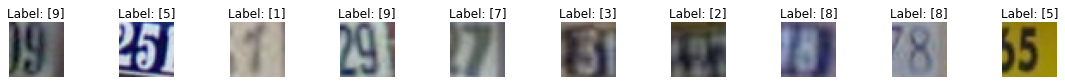

In [10]:
#Select a random sample of images and Plot
import matplotlib.pyplot as plt

num_test_images = scaled_train_images.shape[0]
random_inx = np.random.choice(num_test_images, 10)
random_test_images = scaled_train_images[random_inx, ...]
random_test_labels = train_labels[random_inx, ...]

fig, ax = plt.subplots(1, 10, figsize =(20, 1) )
fig.subplots_adjust(hspace=0.1, wspace=-0.1)
for i in range (10) :
  ax[i].set_axis_off()
  ax[i].set_title(f'Label: {random_test_labels[i]}')
  ax[i].imshow(random_test_images[i])

In [11]:
# To average over the last axis of my_image, use

# np.average(my_image, axis=-1)
# If my_image has shape (H, W, 3), then np.average(my_image, axis=-1) will return an array of shape (H, W)

grey_train = np.average(scaled_train_images, axis=-1)
grey_test = np.average(scaled_test_images, axis=-1)
print (grey_train.shape)
print (grey_test.shape)

(73257, 32, 32)
(26032, 32, 32)


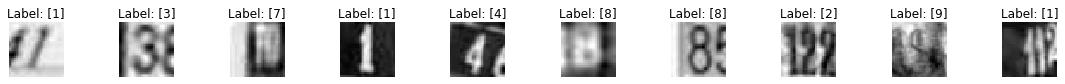

In [12]:
#Select a random sample of images and Plot
num_test_images = grey_train.shape[0]
random_inx = np.random.choice(num_test_images, 10)
random_test_images = grey_train[random_inx, ...]
random_test_labels = train_labels[random_inx, ...]

fig, ax = plt.subplots(1, 10, figsize =(20, 1) )
fig.subplots_adjust(hspace=0.1, wspace=-0.1)
for i in range (10) :
  ax[i].set_axis_off()
  ax[i].set_title(f'Label: {random_test_labels[i]}')
  ax[i].imshow(random_test_images[i],interpolation='nearest', cmap=plt.get_cmap('gray'))

In [13]:
# Add a dummy channel dimension

my_image_train = grey_train[..., np.newaxis]
my_image_test = grey_test[..., np.newaxis]
print(my_image_train.shape)
print (my_image_test.shape)

(73257, 32, 32, 1)
(26032, 32, 32, 1)


In [14]:
# One-hot encoding of train and test labels

# Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. 
# Hint: retain the channel dimension, which will now have size 1.
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
my_train_labels = lb.fit_transform(train_labels)
my_test_labels = lb.fit_transform(test_labels)
print(my_train_labels.shape)
print(my_test_labels.shape)

(73257, 10)
(26032, 10)


## 2. MLP neural network classifier
* Build an MLP classifier model using the Sequential API. Your model should use only Flatten and Dense layers, with the final layer having a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different MLP architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 4 or 5 layers._
* Print out the model summary (using the summary() method)
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run. 
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* As a guide, you should aim to achieve a final categorical cross entropy training loss of less than 1.0 (the validation loss might be higher).
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [23]:
#Hint: to achieve a reasonable accuracy you won't need to use more than 4 or 5 layers.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential ( [
                      Flatten (input_shape = my_image_train[0].shape),
                      Dense (400, activation = 'relu', kernel_initializer='he_uniform',bias_initializer="ones", 
                             kernel_regularizer=tf.keras.regularizers.l1(1e-8) ),
                      Dense (168, activation = 'relu', kernel_initializer='he_uniform',bias_initializer="ones", 
                             kernel_regularizer=tf.keras.regularizers.l1(1e-8)),
                      Dense (168, activation = 'relu', kernel_initializer='he_uniform',bias_initializer="ones", 
                             kernel_regularizer=tf.keras.regularizers.l1(1e-8)),
                      Dense (10, activation = 'softmax'),
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 400)               410000    
_________________________________________________________________
dense_4 (Dense)              (None, 168)               67368     
_________________________________________________________________
dense_5 (Dense)              (None, 168)               28392     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1690      
Total params: 507,450
Trainable params: 507,450
Non-trainable params: 0
_________________________________________________________________


In [24]:
#Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run.
model.compile ( optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005, beta_1=0.9),
               loss = tf.keras.losses.CategoricalCrossentropy() ,
               metrics = [ tf.keras.metrics.CategoricalAccuracy() ])

In [25]:
#track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint (filepath = 'checkpoint/checkpoint', monitor = 'val_categorical_accuracy',save_weights_only = True,save_beat_only = True, save_freq = 'epoch', verbose = 1)

early = EarlyStopping(monitor = 'val_categorical_accuracy', patience = 10, mode = 'max', min_delta = 5, verbose = 1 )

call = [checkpoint, early]

In [26]:
#train

history = model.fit(my_image_train,my_train_labels, validation_split= 0.15 , batch_size=256, epochs=30, callbacks=call, verbose=1)

Epoch 1/30
244/244 [==============================] - 5s 19ms/step - loss: 2.2641 - categorical_accuracy: 0.2039 - val_loss: 2.0850 - val_categorical_accuracy: 0.2946

Epoch 00001: saving model to checkpoint/checkpoint
Epoch 2/30
244/244 [==============================] - 4s 18ms/step - loss: 1.7690 - categorical_accuracy: 0.3955 - val_loss: 1.5605 - val_categorical_accuracy: 0.4962

Epoch 00002: saving model to checkpoint/checkpoint
Epoch 3/30
244/244 [==============================] - 4s 18ms/step - loss: 1.3613 - categorical_accuracy: 0.5595 - val_loss: 1.3127 - val_categorical_accuracy: 0.5746

Epoch 00003: saving model to checkpoint/checkpoint
Epoch 4/30
244/244 [==============================] - 4s 18ms/step - loss: 1.1715 - categorical_accuracy: 0.6289 - val_loss: 1.1230 - val_categorical_accuracy: 0.6430

Epoch 00004: saving model to checkpoint/checkpoint
Epoch 5/30
244/244 [==============================] - 4s 18ms/step - loss: 1.0723 - categorical_accuracy: 0.6637 - val_loss:

In [27]:
import pandas as pd
frame = pd.DataFrame(history.history)
frame.tail()

,loss,categorical_accuracy,val_loss,val_categorical_accuracy
6,0.928597,0.712019,0.983183,0.685049
7,0.873996,0.731772,1.028155,0.666030
8,0.834683,0.741649,0.843793,0.736737
9,0.802876,0.751365,0.890518,0.716717
10,0.776661,0.757837,0.814882,0.749113


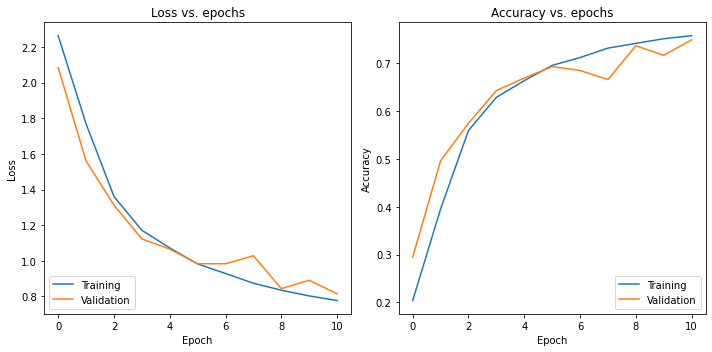

In [28]:
# Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
plt.figure(figsize=(10,5))
ax1 = plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training','Validation'],loc='lower left')
ax2 = plt.subplot(122)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training','Validation'],loc='lower right')
plt.tight_layout()
plt.show()

In [29]:
#As a guide, you should aim to achieve a final categorical cross entropy training loss of less than 1.0 (the validation loss might be higher).
model.evaluate(my_image_test,my_test_labels,verbose=1)

814/814 [==============================] - 2s 3ms/step - loss: 0.9026 - categorical_accuracy: 0.7251


[0.9026365876197815, 0.7250691652297974]

## 3. CNN neural network classifier
* Build a CNN classifier model using the Sequential API. Your model should use the Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense and Dropout layers. The final layer should again have a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different CNN architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 2 or 3 convolutional layers and 2 fully connected layers.)_
* The CNN model should use fewer trainable parameters than your MLP model.
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run.
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* You should aim to beat the MLP model performance with fewer parameters!
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [30]:
#won't need to use more than 2 or 3 convolutional layers and 2 fully connected layers.
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout

model_cnn = Sequential ([
                         Conv2D(32,(3,3),padding='SAME',activation='relu', input_shape= my_image_train[0].shape ),
                         Conv2D(32,(3,3),padding='SAME',activation='relu'),
                         MaxPool2D((4,4)),
                         BatchNormalization(),
                         Dropout(0.5),
                         Flatten(),
                         Dense(10, activation = 'softmax')
])

model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 32)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 8, 8, 32)          128       
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [31]:
model_cnn.compile ( optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005, beta_1=0.9),
                   loss = tf.keras.losses.CategoricalCrossentropy() ,
                   metrics = [ tf.keras.metrics.CategoricalAccuracy() ])

In [32]:
checkpoint_cnn = ModelCheckpoint (filepath = 'checkpoint_cnn/checkpoint', monitor = 'val_categorical_accuracy',save_weights_only = True,save_beat_only = True, save_freq = 'epoch', verbose = 1)

early_cnn = EarlyStopping(monitor = 'val_categorical_accuracy', patience = 10, mode = 'max', min_delta = 5, verbose = 1 )

call_cnn = [checkpoint_cnn, early_cnn]

In [33]:
history_cnn = model_cnn.fit(my_image_train,my_train_labels, validation_split= 0.15 , 
                            batch_size=256, epochs=30, callbacks=call_cnn, verbose=1)

Epoch 1/30
244/244 [==============================] - 140s 572ms/step - loss: 1.8425 - categorical_accuracy: 0.3797 - val_loss: 1.9926 - val_categorical_accuracy: 0.5552

Epoch 00001: saving model to checkpoint_cnn/checkpoint
Epoch 2/30
244/244 [==============================] - 140s 574ms/step - loss: 1.0033 - categorical_accuracy: 0.6959 - val_loss: 1.1652 - val_categorical_accuracy: 0.7307

Epoch 00002: saving model to checkpoint_cnn/checkpoint
Epoch 3/30
244/244 [==============================] - 140s 575ms/step - loss: 0.8137 - categorical_accuracy: 0.7544 - val_loss: 0.7060 - val_categorical_accuracy: 0.8093

Epoch 00003: saving model to checkpoint_cnn/checkpoint
Epoch 4/30
244/244 [==============================] - 140s 573ms/step - loss: 0.7482 - categorical_accuracy: 0.7759 - val_loss: 0.6263 - val_categorical_accuracy: 0.8252

Epoch 00004: saving model to checkpoint_cnn/checkpoint
Epoch 5/30
244/244 [==============================] - 140s 574ms/step - loss: 0.7113 - categoric

In [34]:
frame_cnn = pd.DataFrame(history_cnn.history)
frame_cnn.tail()

,loss,categorical_accuracy,val_loss,val_categorical_accuracy
6,0.668044,0.800764,0.594009,0.834289
7,0.656730,0.803992,0.551011,0.840932
8,0.639788,0.807815,0.561365,0.836928
9,0.628804,0.810721,0.533799,0.847757
10,0.617382,0.816117,0.529801,0.852307


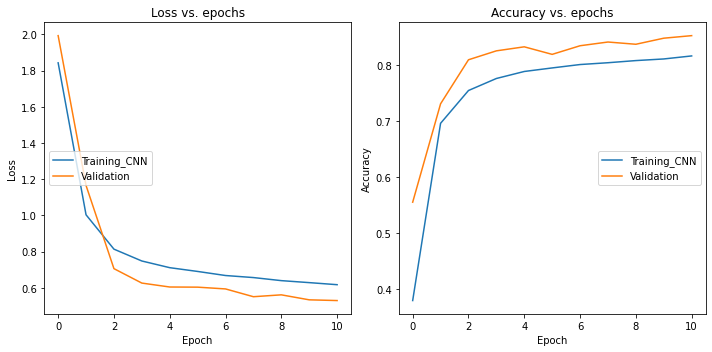

In [35]:
#plot
plt.figure(figsize=(10,5))
ax1 = plt.subplot(121)
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training_CNN','Validation'], loc='center left')
ax2 = plt.subplot(122)
plt.plot(history_cnn.history['categorical_accuracy'])
plt.plot(history_cnn.history['val_categorical_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training_CNN','Validation'], loc='center right')
plt.tight_layout()
plt.show()

In [37]:
model_cnn.evaluate(my_image_test,my_test_labels,verbose=1)

814/814 [==============================] - 15s 18ms/step - loss: 0.5850 - categorical_accuracy: 0.8327


[0.5850266814231873, 0.832744300365448]

## 4. Get model predictions
* Load the best weights for the MLP and CNN models that you saved during the training run.
* Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
* Alongside the image and label, show each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

In [224]:
!ls -lh checkpoint

total 5.5M
-rw-r--r-- 1 root root   77 Oct 19 07:27 checkpoint
-rw-r--r-- 1 root root 5.5M Oct 19 07:27 checkpoint.data-00000-of-00001
-rw-r--r-- 1 root root 1.7K Oct 19 07:27 checkpoint.index


In [225]:
!ls -lh checkpoint_cnn

total 368K
-rw-r--r-- 1 root root   77 Oct 19 07:30 checkpoint
-rw-r--r-- 1 root root 358K Oct 19 07:30 checkpoint.data-00000-of-00001
-rw-r--r-- 1 root root 2.2K Oct 19 07:30 checkpoint.index


In [38]:
#Load the best weights for the MLP and CNN models 
from tensorflow.keras.models import load_model

model.load_weights(tf.train.latest_checkpoint('checkpoint'))

In [39]:
model_cnn.load_weights(tf.train.latest_checkpoint('checkpoint_cnn'))

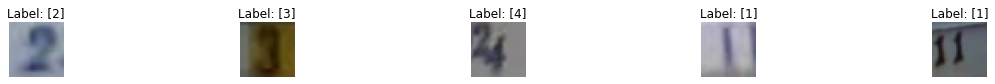

In [40]:
# Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
num_test_images = scaled_test_images.shape[0]
random_inx = np.random.choice(num_test_images, 5)
random_test_images = scaled_test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

fig, ax = plt.subplots(1, 5, figsize =(20, 1) )
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i in range (5) :
  ax[i].set_axis_off()
  ax[i].set_title(f'Label: {random_test_labels[i]}')
  ax[i].imshow(random_test_images[i])

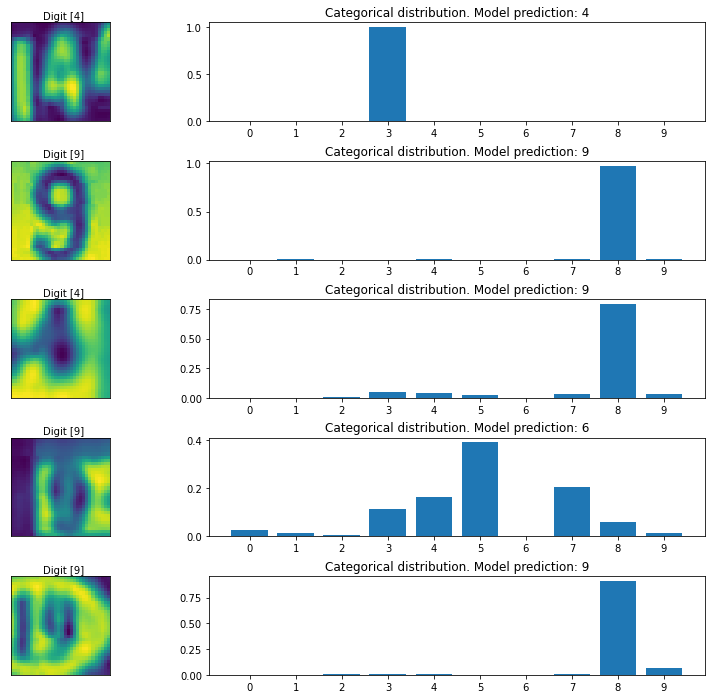

In [41]:
# Alongside the image and label, show each model’s predictive distribution as a bar chart, 

num_test_images = grey_test.shape[0]
random_inx = np.random.choice(num_test_images, 5)
random_test_images = grey_test[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]
16
predictions = model.predict(random_test_images)
# predictions_cnn = model_cnn.predict(random_test_images)

fig, axes = plt.subplots(5, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)
for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
  axes[i, 0].imshow(np.squeeze(image))
  axes[i, 0].get_xaxis().set_visible(False)
  axes[i, 0].get_yaxis().set_visible(False)
  axes[i, 0].text(10., -1.5, f'Digit {label}')
  axes[i, 1].bar(np.arange(len(prediction)), prediction)
  axes[i, 1].set_xticks(np.arange(len(prediction)))
  axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)+1}")


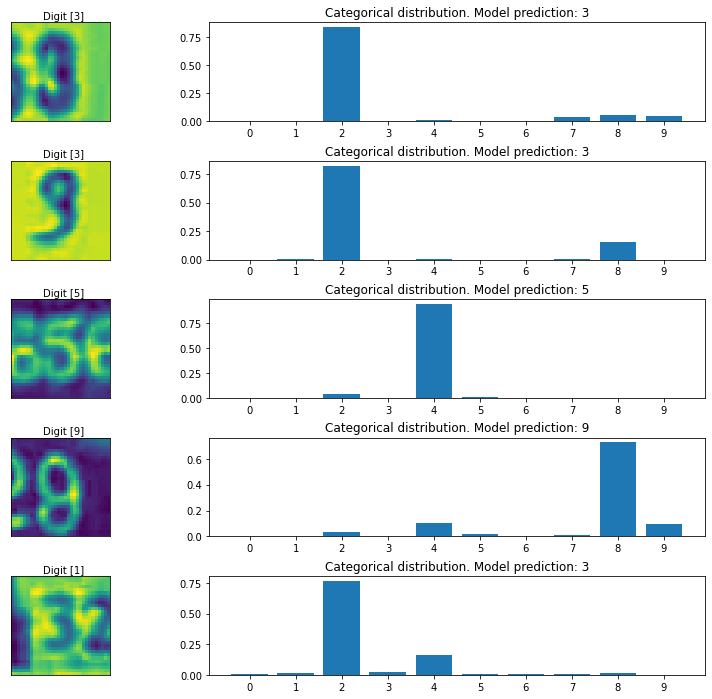

In [43]:
num_test_images = my_image_test.shape[0]
random_inx = np.random.choice(num_test_images, 5)
random_test_images = my_image_test[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

# predictions = model.predict(random_test_images)
predictions_cnn = model_cnn.predict(random_test_images)

fig, axes = plt.subplots(5, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)
for i, (prediction, image, label) in enumerate(zip(predictions_cnn, random_test_images, random_test_labels)):
  axes[i, 0].imshow(np.squeeze(image))
  axes[i, 0].get_xaxis().set_visible(False)
  axes[i, 0].get_yaxis().set_visible(False)
  axes[i, 0].text(10., -1.5, f'Digit {label}')
  axes[i, 1].bar(np.arange(len(prediction)), prediction)
  axes[i, 1].set_xticks(np.arange(len(prediction)))
  axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)+1}")